In [1]:
import twitter

CONSUMER_KEY = ''
CONSUMER_SECRET = ''
OAUTH_TOKEN = ''
OAUTH_TOKEN_SECRET = ''

auth = twitter.oauth.OAuth(OAUTH_TOKEN, OAUTH_TOKEN_SECRET,
                           CONSUMER_KEY, CONSUMER_SECRET)

twitter_api = twitter.Twitter(auth=auth)

print(twitter_api)

# Retrieving trends

In [2]:
WORLD_WOE_ID = 1
US_WOE_ID = 23424977

# Prefix ID with the underscore for query string parameterization.
# Without the underscore, the twitter package appends the ID value
# to the URL itself as a special case keyword argument.

world_trends = twitter_api.trends.place(_id=WORLD_WOE_ID)
us_trends = twitter_api.trends.place(_id=US_WOE_ID)

print(world_trends)
print()
print(us_trends)

[{'trends': [{'name': '#MeCaigoEnVivo', 'url': 'http://twitter.com/search?q=%23MeCaigoEnVivo', 'promoted_content': None, 'query': '%23MeCaigoEnVivo', 'tweet_volume': 14979}, {'name': '#ReleaseTheContract', 'url': 'http://twitter.com/search?q=%23ReleaseTheContract', 'promoted_content': None, 'query': '%23ReleaseTheContract', 'tweet_volume': 28011}, {'name': '#AllInTheFamily', 'url': 'http://twitter.com/search?q=%23AllInTheFamily', 'promoted_content': None, 'query': '%23AllInTheFamily', 'tweet_volume': 17726}, {'name': '#TheJeffersons', 'url': 'http://twitter.com/search?q=%23TheJeffersons', 'promoted_content': None, 'query': '%23TheJeffersons', 'tweet_volume': 15181}, {'name': '#ElectionResults2019', 'url': 'http://twitter.com/search?q=%23ElectionResults2019', 'promoted_content': None, 'query': '%23ElectionResults2019', 'tweet_volume': 58852}, {'name': 'Marco Ruben', 'url': 'http://twitter.com/search?q=%22Marco+Ruben%22', 'promoted_content': None, 'query': '%22Marco+Ruben%22', 'tweet_vol

In [3]:
for trend in world_trends[0]['trends']:
    print(trend['name'])

#MeCaigoEnVivo
#ReleaseTheContract
#AllInTheFamily
#TheJeffersons
#ElectionResults2019
Marco Ruben
Marla Gibbs
COAF
Morumbi
Casco
Roldán
Paranaense
キスの日
Vamos River
Rajai Davis
All in the Family
Joplin
José Aldo
Jamie Foxx
George Jefferson
Juventude
Orioles
レモンの匂い
#LiveInFrontOfAStudioAudience
#عيديه_افنان_من_كارديال
#مرسيدس_نخبه_العود22
#1stVideoGameCrush
#زياد_الجهني
#RIVERxESPN
#TheChallenge33
#Verdict2019
#BrazilIsExcitedForBTS
#عيديات_وعطورات_مع_د_محمد_وسعد
#DetenteBenjamín
#JokowiMundurlah
#あなたのCLAMPはどこから
#مسابقه_طرق_الرياض18
#العاصوف_في_مجموعه_انسان
#WhereAreYouFrom
#ChicagoFire
#1stAnimeCrush
#مفروشات_العبداللطيف_7_ايفون
#مسابقه_المربع_نت١٨
#الهدايا_مع_احمد_5000_ريال
#GobackModi
#RecopaSudamericana
#愛してくれる人はいるのか
#ChicagoPD
#AmazingRace
#ABPresults2019


In [4]:
for trend in us_trends[0]['trends']:
    print(trend['name'])

#AllInTheFamily
#TheJeffersons
#LiveInFrontOfAStudioAudience
#ReleaseTheContract
#TheChallenge33
Marla Gibbs
Joplin
All in the Family
Jamie Foxx
Rajai Davis
George Jefferson
Orioles
Gleyber Torres
Jennifer Hudson
Norman Lear
Marisa Tomei
edith
Turbo
Golden City
Juan Lagares
Gary Thorne
Harriet Tubman
Charlie Tilson
Archie Bunker
Carl Junction
Mother Jefferson
Albert Almora
Woody Harrelson
kerry washington
Sherman Hemsley
New Apartment
#ChicagoFire
#ChicagoPD
#my600lblife
#AmazingRace
#1stAnimeCrush
#JEFFERSONS
#SaveWhiskeyCavalier
#TrumpTantrum
#PLLThePerfectionists
#ImpulsiveBuyingRegrets
#lastnightasaviking
#TheWeirdThingAboutMeIs
#WWENXT
#WhiskeyCavailer
#turbulentselfies
#SEALTeam
#ElectionResults2019
#OneChicago
#Stellaride


In [5]:
world_trends_set = set([trend['name'] 
                        for trend in world_trends[0]['trends']])

us_trends_set = set([trend['name'] 
                     for trend in us_trends[0]['trends']]) 

common_trends = world_trends_set.intersection(us_trends_set)

print(common_trends)

{'#TheJeffersons', 'Joplin', '#1stAnimeCrush', 'Orioles', 'George Jefferson', '#TheChallenge33', '#ElectionResults2019', '#AllInTheFamily', 'Rajai Davis', 'All in the Family', '#ChicagoFire', '#LiveInFrontOfAStudioAudience', '#AmazingRace', 'Jamie Foxx', '#ReleaseTheContract', '#ChicagoPD', 'Marla Gibbs'}


# Anatomy of a Tweet

In [6]:
import json


q = '#AmazingRace' 

count = 100

# Import unquote to prevent url encoding errors in next_results
from urllib.parse import unquote

# See https://dev.twitter.com/rest/reference/get/search/tweets

search_results = twitter_api.search.tweets(q=q, count=count)

statuses = search_results['statuses']


# Iterate through 5 more batches of results by following the cursor
for _ in range(5):
    print('Length of statuses', len(statuses))
    try:
        next_results = search_results['search_metadata']['next_results']
    except KeyError as e: # No more results when next_results doesn't exist
        break
        
    # Create a dictionary from next_results, which has the following form:
    # ?max_id=847960489447628799&q=%23RIPSelena&count=100&include_entities=1
    kwargs = dict([ kv.split('=') for kv in unquote(next_results[1:]).split("&") ])
    
    search_results = twitter_api.search.tweets(**kwargs)
    statuses += search_results['statuses']

# Show one sample search result by slicing the list...
print(json.dumps(statuses[0], indent=1))

Length of statuses 65
Length of statuses 140
Length of statuses 227
Length of statuses 327
Length of statuses 415
{
 "created_at": "Thu May 23 02:57:00 +0000 2019",
 "id": 1131393564984918016,
 "id_str": "1131393564984918016",
 "text": "RT @AmazingRaceCBS: \ud83e\udd23\ud83e\udd23\ud83e\udd23 #AmazingRace https://t.co/8JBE6fOJie",
 "truncated": false,
 "entities": {
  "hashtags": [
   {
    "text": "AmazingRace",
    "indices": [
     24,
     36
    ]
   }
  ],
  "symbols": [],
  "user_mentions": [
   {
    "screen_name": "AmazingRaceCBS",
    "name": "The Amazing Race",
    "id": 68792362,
    "id_str": "68792362",
    "indices": [
     3,
     18
    ]
   }
  ],
  "urls": [],
  "media": [
   {
    "id": 1131368162186817536,
    "id_str": "1131368162186817536",
    "indices": [
     37,
     60
    ],
    "media_url": "http://pbs.twimg.com/tweet_video_thumb/D7NtWWlU8AA4FiR.jpg",
    "media_url_https": "https://pbs.twimg.com/tweet_video_thumb/D7NtWWlU8AA4FiR.jpg",
    "url": "https://

In [7]:
for i in range(10):
    print()
    print(statuses[i]['text'])
    print('Favorites: ', statuses[i]['favorite_count'])
    print('Retweets: ', statuses[i]['retweet_count'])


RT @AmazingRaceCBS: 🤣🤣🤣 #AmazingRace https://t.co/8JBE6fOJie
Favorites:  0
Retweets:  15

RT @MattOMalley: Two weeks from tonight: Join @BretLaBelle &amp; me at Kellehers (1410 Centre St., Rosl.) for an @AmazingRaceCBS viewing party…
Favorites:  0
Retweets:  3

The one nice thing about the head-to-head is that nobody has to be alone when they get eliminated. (I mean, that’s… https://t.co/sKtK8EU3iI
Favorites:  1
Retweets:  0

RT @AmazingRaceCBS: Fun Detours, thrilling challenges, and intense head-to-head battles. Prepare for two exciting episodes of #AmazingRace…
Favorites:  0
Retweets:  35

RT @AmazingRaceCBS: $1 million is still up for grabs, and the remaining teams are giving it their all. The #AmazingRace returns tonight at…
Favorites:  0
Retweets:  18

RT @Alexafan23: @RachelEReilly @CBSTweet @RachelEReilly @ElissaReillyS #AmazingRace #TAR31 https://t.co/DNEFp1dWx9
Favorites:  0
Retweets:  1

RT @AmazingRaceCBS: Dance break. #AmazingRace https://t.co/5ROwhISjQG
Favorites:  0
Retw

# Extracting text, screen names, and hashtags from tweets¶


In [8]:
status_texts = [ status['text'] 
                 for status in statuses ]

screen_names = [ user_mention['screen_name'] 
                 for status in statuses
                     for user_mention in status['entities']['user_mentions'] ]

hashtags = [ hashtag['text'] 
             for status in statuses
                 for hashtag in status['entities']['hashtags'] ]

# Compute a collection of all words from all tweets
words = [ w 
          for t in status_texts 
              for w in t.split() ]

# Explore the first 5 items for each...

print(json.dumps(status_texts[0:5], indent=1))
print(json.dumps(screen_names[0:5], indent=1) )
print(json.dumps(hashtags[0:5], indent=1))
print(json.dumps(words[0:5], indent=1))

[
 "RT @AmazingRaceCBS: \ud83e\udd23\ud83e\udd23\ud83e\udd23 #AmazingRace https://t.co/8JBE6fOJie",
 "RT @MattOMalley: Two weeks from tonight: Join @BretLaBelle &amp; me at Kellehers (1410 Centre St., Rosl.) for an @AmazingRaceCBS viewing party\u2026",
 "The one nice thing about the head-to-head is that nobody has to be alone when they get eliminated. (I mean, that\u2019s\u2026 https://t.co/sKtK8EU3iI",
 "RT @AmazingRaceCBS: Fun Detours, thrilling challenges, and intense head-to-head battles. Prepare for two exciting episodes of #AmazingRace\u2026",
 "RT @AmazingRaceCBS: $1 million is still up for grabs, and the remaining teams are giving it their all. The #AmazingRace returns tonight at\u2026"
]
[
 "AmazingRaceCBS",
 "MattOMalley",
 "BretLaBelle",
 "AmazingRaceCBS",
 "AmazingRaceCBS"
]
[
 "AmazingRace",
 "AmazingRace",
 "AmazingRace",
 "AmazingRace",
 "TAR31"
]
[
 "RT",
 "@AmazingRaceCBS:",
 "\ud83e\udd23\ud83e\udd23\ud83e\udd23",
 "#AmazingRace",
 "https://t.co/8JBE6fOJie"
]


# Create a basic frequency distribution from the words in tweets

In [9]:
from collections import Counter

for item in [words, screen_names, hashtags]:
    c = Counter(item)
    print(c.most_common()[:10]) # top 10
    print()

[('#AmazingRace', 382), ('the', 191), ('to', 161), ('and', 155), ('RT', 152), ('a', 146), ('is', 105), ('I', 89), ('on', 85), ('of', 76)]

[('tyleroakley', 57), ('AmazingRaceCBS', 51), ('PhilKeoghan', 29), ('koreykuhl', 22), ('RachelEReilly', 13), ('JanellePierzina', 10), ('britney_haynes', 10), ('BretLaBelle', 9), ('BB_timc', 7), ('HaymakerHattie', 6)]

[('AmazingRace', 421), ('amazingrace', 19), ('TAR31', 14), ('TeamTylerandKorey', 13), ('TAR', 9), ('Survivor', 7), ('RacersRecap', 7), ('TeamTylerAndKorey', 6), ('BigBrother', 6), ('Head2Head', 5)]



# Using prettytable to display tuples in a nice tabular format


In [11]:
from prettytable import PrettyTable

for label, data in (('Word', words), 
                    ('Screen Name', screen_names), 
                    ('Hashtag', hashtags)):
    pt = PrettyTable(field_names=[label, 'Count']) 
    c = Counter(data)
    [ pt.add_row(kv) for kv in c.most_common()[:10] ]
    pt.align[label], pt.align['Count'] = 'l', 'r' # Set column alignment
    print(pt)

[None, None, None, None, None, None, None, None, None, None]

+--------------+-------+
| Word         | Count |
+--------------+-------+
| #AmazingRace |   382 |
| the          |   191 |
| to           |   161 |
| and          |   155 |
| RT           |   152 |
| a            |   146 |
| is           |   105 |
| I            |    89 |
| on           |    85 |
| of           |    76 |
+--------------+-------+


[None, None, None, None, None, None, None, None, None, None]

+-----------------+-------+
| Screen Name     | Count |
+-----------------+-------+
| tyleroakley     |    57 |
| AmazingRaceCBS  |    51 |
| PhilKeoghan     |    29 |
| koreykuhl       |    22 |
| RachelEReilly   |    13 |
| JanellePierzina |    10 |
| britney_haynes  |    10 |
| BretLaBelle     |     9 |
| BB_timc         |     7 |
| HaymakerHattie  |     6 |
+-----------------+-------+


[None, None, None, None, None, None, None, None, None, None]

+-------------------+-------+
| Hashtag           | Count |
+-------------------+-------+
| AmazingRace       |   421 |
| amazingrace       |    19 |
| TAR31             |    14 |
| TeamTylerandKorey |    13 |
| TAR               |     9 |
| Survivor          |     7 |
| RacersRecap       |     7 |
| TeamTylerAndKorey |     6 |
| BigBrother        |     6 |
| Head2Head         |     5 |
+-------------------+-------+


# Calculating lexical diversity for tweets

In [12]:

# A function for computing lexical diversity
def lexical_diversity(tokens):
    return len(set(tokens))/len(tokens) 

# A function for computing the average number of words per tweet
def average_words(statuses):
    total_words = sum([ len(s.split()) for s in statuses ]) 
    return total_words/len(statuses)

print(lexical_diversity(words))
print(lexical_diversity(screen_names))
print(lexical_diversity(hashtags))
print(average_words(status_texts))

0.29327708219923787
0.28106508875739644
0.11525974025974026
14.43614931237721


# Find most popular retweets

In [13]:
retweets = [
            # Store out a tuple of these three values ...
            (status['retweet_count'], 
             status['retweeted_status']['user']['screen_name'],
             status['retweeted_status']['id'],
             status['text']) 
            
            # ... for each status ...
            for status in statuses 
            
            # ... so long as the status meets this condition.
                if 'retweeted_status' in status.keys()
           ]

# Slice off the first 5 from the sorted results and display each item in the tuple

pt = PrettyTable(field_names=['Count', 'Screen Name', 'Tweet ID', 'Text'])
[ pt.add_row(row) for row in sorted(retweets, reverse=True)[:5] ]
pt.max_width['Text'] = 50
pt.align= 'l'
print(pt)

[None, None, None, None, None]

+-------+-------------+---------------------+----------------------------------------------------+
| Count | Screen Name | Tweet ID            | Text                                               |
+-------+-------------+---------------------+----------------------------------------------------+
| 149   | tyleroakley | 1131349357075111936 | RT @tyleroakley: tonight on #AmazingRace, queer    |
|       |             |                     | contestants were sent to locations where being     |
|       |             |                     | queer is a crime. being there with protectio…      |
| 149   | tyleroakley | 1131349357075111936 | RT @tyleroakley: tonight on #AmazingRace, queer    |
|       |             |                     | contestants were sent to locations where being     |
|       |             |                     | queer is a crime. being there with protectio…      |
| 149   | tyleroakley | 1131349357075111936 | RT @tyleroakley: tonight on #AmazingRace, queer    |
|       | 

# Looking up users who have retweeted a status

In [28]:
# Get the original tweet id for a tweet from its retweeted_status node 
# and insert it here

_retweets = twitter_api.statuses.retweets(id=1131349357075111936)
print([r['user']['screen_name'] for r in _retweets])

['itstylernicole', 'mattjuniper', 'DarkSkyDestiny', 'BBvsSurvivor', 'd_m_elms', 'Pamela_Jocelyn', 'snitchseeker731', 'LeoRule4ever', 'elana_danielle', 'MyLifeAs_Ashley', 'kyrababy27', '86TB', 'M_A_Schilling', 'AshleeRenayy', 'JAMartin912', 'OGBigSprite', 'Cc87962961']


# Plotting frequencies of words

Text(0,0.5,'Freq')

Text(0.5,0,'Word Rank')

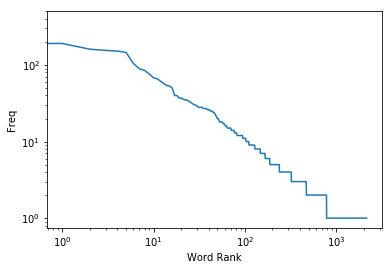

In [29]:

import matplotlib.pyplot as plt
%matplotlib inline
word_counts = sorted(Counter(words).values(), reverse=True)

plt.loglog(word_counts)
plt.ylabel("Freq")
plt.xlabel("Word Rank")

# Generating histograms of words, screen names, and hashtags

(array([2.136e+03, 1.000e+01, 3.000e+00, 2.000e+00, 3.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([  1. ,  39.1,  77.2, 115.3, 153.4, 191.5, 229.6, 267.7, 305.8,
        343.9, 382. ]),
 <a list of 10 Patch objects>)

Text(0.5,1,'Words')

Text(0,0.5,'Number of items in bin')

Text(0.5,0,'Bins (number of times an item appeared)')

<Figure size 432x288 with 0 Axes>

(array([86.,  4.,  1.,  1.,  0.,  1.,  0.,  0.,  1.,  1.]),
 array([ 1. ,  6.6, 12.2, 17.8, 23.4, 29. , 34.6, 40.2, 45.8, 51.4, 57. ]),
 <a list of 10 Patch objects>)

Text(0.5,1,'Screen Names')

Text(0,0.5,'Number of items in bin')

Text(0.5,0,'Bins (number of times an item appeared)')

<Figure size 432x288 with 0 Axes>

(array([70.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([  1.,  43.,  85., 127., 169., 211., 253., 295., 337., 379., 421.]),
 <a list of 10 Patch objects>)

Text(0.5,1,'Hashtags')

Text(0,0.5,'Number of items in bin')

Text(0.5,0,'Bins (number of times an item appeared)')

<Figure size 432x288 with 0 Axes>

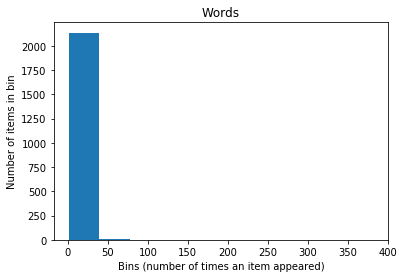

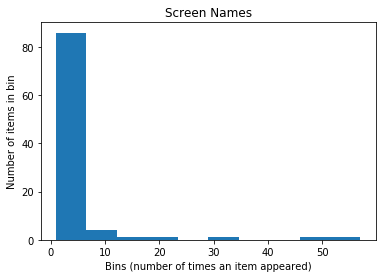

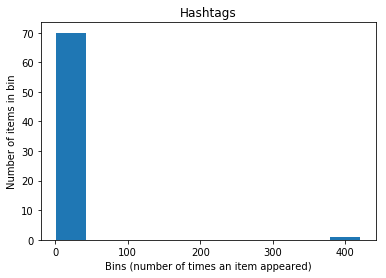

<Figure size 432x288 with 0 Axes>

In [30]:
for label, data in (('Words', words), 
                    ('Screen Names', screen_names), 
                    ('Hashtags', hashtags)):

    # Build a frequency map for each set of data
    # and plot the values
    c = Counter(data)
    plt.hist(list(c.values()))
    
    # Add a title and y-label ...
    plt.title(label)
    plt.ylabel("Number of items in bin")
    plt.xlabel("Bins (number of times an item appeared)")
    
    # ... and display as a new figure
    plt.figure()

# Generating a histogram of retweet counts

(array([114.,   8.,   2.,   0.,   0.,   0.,   0.,   0.,   0.,  27.]),
 array([  1. ,  15.8,  30.6,  45.4,  60.2,  75. ,  89.8, 104.6, 119.4,
        134.2, 149. ]),
 <a list of 10 Patch objects>)

Text(0.5,1,'Retweets')

Text(0.5,0,'Bins (number of times retweeted)')

Text(0,0.5,'Number of tweets in bin')

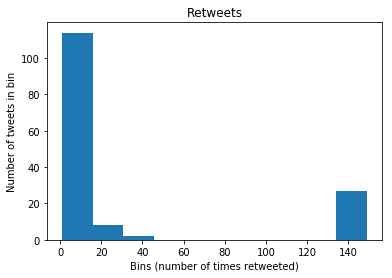

In [16]:
# Using underscores while unpacking values in
# a tuple is idiomatic for discarding them

counts = [count for count, _, _, _ in retweets]

plt.hist(counts)
plt.title('Retweets')
plt.xlabel('Bins (number of times retweeted)')
plt.ylabel('Number of tweets in bin')

# Sentiment

In [17]:
# pip install nltk
import nltk
nltk.download('vader_lexicon')

import numpy as np
from nltk.sentiment.vader import SentimentIntensityAnalyzer

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\emyhr\AppData\Roaming\nltk_data...


True

C:\Users\emyhr\Anaconda3\lib\site-packages\nltk\twitter\__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [18]:
twitter_stream = twitter.TwitterStream(auth=auth)
iterator = twitter_stream.statuses.sample()

In [19]:

tweets = []
for tweet in iterator:
    try:
        if tweet['lang'] == 'en':
            tweets.append(tweet)
    except:
        pass
    if len(tweets) == 100:
        break

In [20]:
analyzer = SentimentIntensityAnalyzer()


In [21]:
analyzer.polarity_scores('Hello')


{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

In [23]:
scores = np.zeros(len(tweets))

for i, t in enumerate(tweets):
    # Extract the text portion of the tweet
    text = t['text']
    
    # Measure the polarity of the tweet
    polarity = analyzer.polarity_scores(text)
    
    # Store the normalized, weighted composite score
    scores[i] = polarity['compound']

In [24]:
most_positive = np.argmax(scores)
most_negative = np.argmin(scores)

In [25]:
print('{0:6.3f} : "{1}"'.format(scores[most_positive], tweets[most_positive]['text']))

 0.891 : "@kingkanono I’m all for freeing the nip and living your life. Honestly I laughed , like someone needs to teach thes… https://t.co/gecnC4u3Xz"


In [26]:
print('{0:6.3f} : "{1}"'.format(scores[most_negative], tweets[most_negative]['text']))

-0.932 : "RT @MrMouthPiece_: hold up.... sirius black’s death was sad asf BUT professor snape’s death was worse in my opinion https://t.co/qKBZf2BNuc"


# Creating a social graph from twitter
Lets try and create a social graph from a community on twitter. The idea is to use a hashtag from that would be commonly used by a Twitter community and not by others, such as a chat hashtag for a Twitter chat being held at a specific time.

# Tweepy

Search for literally anything. Here, I searched for more about #AmazingRace and limited the results to the 4000 most recent tweets

In [ ]:
import tweepy
import csv 
import pandas as pd
import time
import sys

In [46]:
#Twitter API credentials
consumer_key = ""
consumer_secret = ""
access_key = "-"
access_secret = ""

In [47]:
OAUTH_KEYS = {'consumer_key':consumer_key, 
              'consumer_secret':consumer_secret,
              'access_token_key':access_key,
              'access_token_secret':access_secret}

auth = tweepy.OAuthHandler(OAUTH_KEYS['consumer_key'], OAUTH_KEYS['consumer_secret'])

api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)

## Searching twitter

In [48]:
search = tweepy.Cursor(api.search, q='#amazingrace').items(400)


In [49]:
# Create lists for each field desired from the tweets.
sn = []
text = []
timestamp =[]
for tweet in search:
    #print tweet.user.screen_name, tweet.created_at, tweet.text
    timestamp.append(tweet.created_at)
    sn.append(tweet.user.screen_name)
    text.append(tweet.text)

In [50]:
# Convert lists to dataframe
df = pd.DataFrame()
df['timestamp'] = timestamp
df['sn'] = sn
df['text'] = text

In [51]:
# Prepare date filtering. Adding an EST time column since chat hosted by people in that time zone.
df['timestamp'] = pd.to_datetime(df['timestamp'])
df['EST'] = df['timestamp'] - pd.Timedelta(hours=5) #Convert to EST

In [52]:
df['EST'] = pd.to_datetime(df['EST'])

In [53]:
# Subset for the dates required. Can select a specific date or time to examine.
import time
df = df[(pd.to_datetime("2019-05-22 00:00:00", format='%Y-%m-%d %H:%M:%S') < df['EST']) & (df['EST'] < pd.to_datetime("2019-05-22 23:00:00", format='%Y-%m-%d %H:%M:%S'))]

In [54]:
# Write out Tweets in case they are needed later.
df.to_csv('amazingrace_400.csv',index = False,encoding='utf-8')

In [55]:
# Create a list of the unique usernames in order to see which users we need to retrieve friends for.
allNames = list(df['sn'].unique())

Now having a list of all of the users we would like to include in our community, we can retrive additional necessary information such as who their are following in order to build our social graph.



In [56]:
# Initialize dataframe of users that will hold the edge relationships
dfUsers = pd.DataFrame()
dfUsers['userFromName'] =[]
dfUsers['userFromId'] =[]
dfUsers['userToId'] = []
count = 0

In [58]:

nameCount = len(allNames)
# The choice to retrieve friends (who the user is following) rather than followers is intentional.
# Either would work. However, many Twitter users follow fewer users than are following them, especially the most popular accounts. 
# This reduces the number of very large calls to Twitter API, which seemed to cause problems.
for name in allNames:
    # Build list of friends    
    currentFriends = []
    for page in tweepy.Cursor(api.friends_ids, screen_name=name).pages():
        currentFriends.extend(page)
    currentId = api.get_user(screen_name=name).id
    currentId = [currentId] * len(currentFriends)
    currentName = [name] * len(currentFriends)   
    dfTemp = pd.DataFrame()
    dfTemp['userFromName'] = currentName
    dfTemp['userFromId'] = currentId
    dfTemp['userToId'] = currentFriends
    dfUsers = pd.concat([dfUsers,dfTemp])
    time.sleep(70) # avoids hitting Twitter rate limit
    # Progress bar to track approximate progress
    count +=1
    per = round(count*100.0/nameCount,1)
    sys.stdout.write("\rTwitter call %s%% complete." % per)
    sys.stdout.flush()

Twitter call 11.6% complete.

Rate limit reached. Sleeping for: 48


Twitter call 13.2% complete.

TweepError: Not authorized.

In [ ]:
# Again, to limit the number of calls to Twitter API, just do lookups on followers that connect to those in our user group.
# We are not interested in "friends" that are not part of this community.
fromId = dfUsers['userFromId'].unique()
dfChat = dfUsers[dfUsers['userToId'].apply(lambda x: x in fromId)]

In [ ]:
# No more Twitter API lookups are necessary. Create a lookup table that we will use to get the verify the userToName
dfLookup = dfChat[['userFromName','userFromId']]
dfLookup = dfLookup.drop_duplicates()
dfLookup.columns = ['userToName','userToId']
dfCommunity = dfUsers.merge(dfLookup, on='userToId')

In [ ]:
dfCommunity.to_csv('dfCommunity.csv',index = False,encoding='utf-8')

We've gathered the Tweets, usernames, and friends of a community that participated in a Twitter chat. Let's visualize the network,